### Import packages and set config

In [ ]:
import pandas as pd
from tqdm.asyncio import tqdm


## Clustering analysis

In [2]:
embedding_df = pd.read_csv('/hadatasets/fillipe.silva/LLMSegm/data/banking/distilgpt2_25_test_embeddings.csv')

### Determining The Optimal Number Of Clusters

In [3]:
ce = clusteval(evaluate='silhouette',
               cluster='kmeans',
               min_clust=2,
               verbose='info')
results = ce.fit(embedding_df)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[kmeans], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [06:32<00:00, 17.07s/it]
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


In [3]:
OPTIMAL_CLUSTERS = 2
N_INIT = 10
MAX_ITER = 100

### Plotting Silhouette Score

[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Compute t-SNE embedding.
[clusteval] >INFO> Estimated number of n_clusters: 1, average silhouette_score=0.084
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were fou

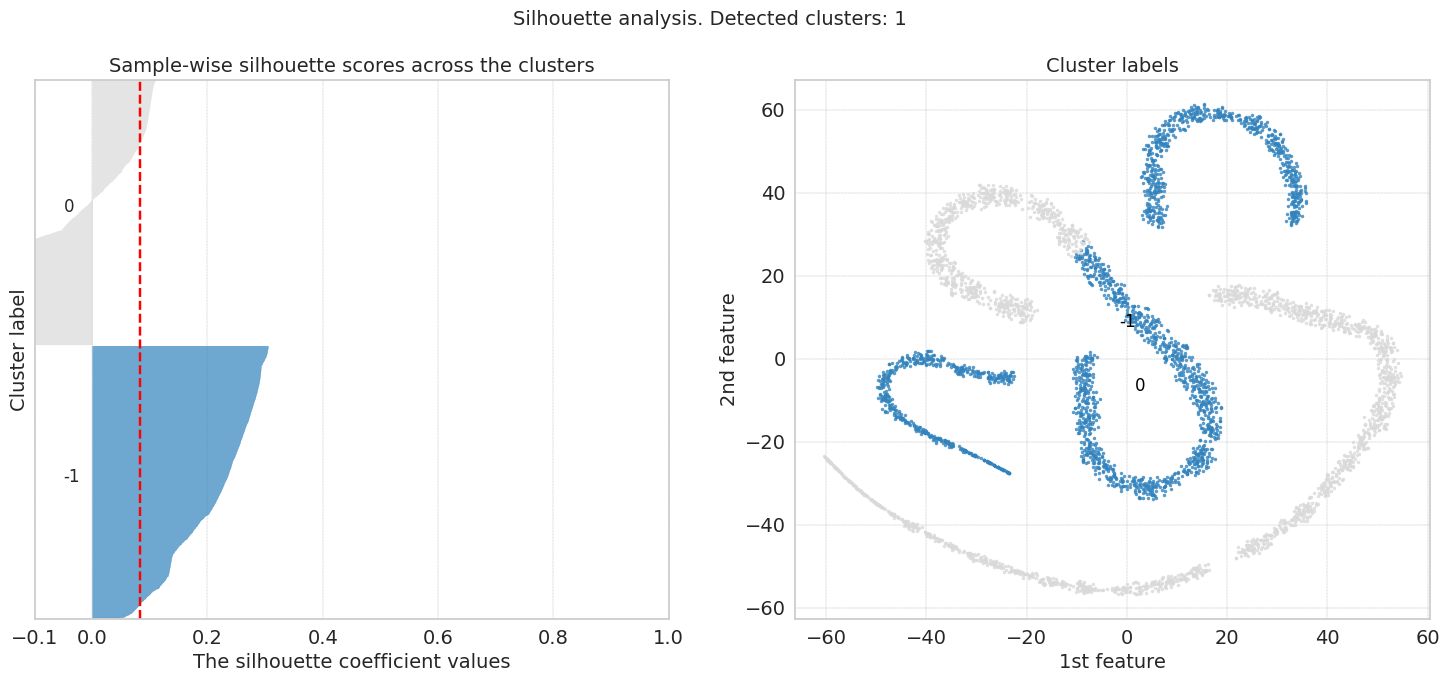

(<Figure size 1800x700 with 2 Axes>,
 <Axes: title={'center': 'Sample-wise silhouette scores across the clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <Axes: title={'center': 'Cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [5]:
ce.plot_silhouette(embedding='tsne')

### Detect the Driving Features Behind the Cluster Labels.

[clusteval] >ERROR> The Library [hnet] is not installed by default. Try: <pip install hnet>
[clusteval] >INFO> Retrieving input data set.


[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

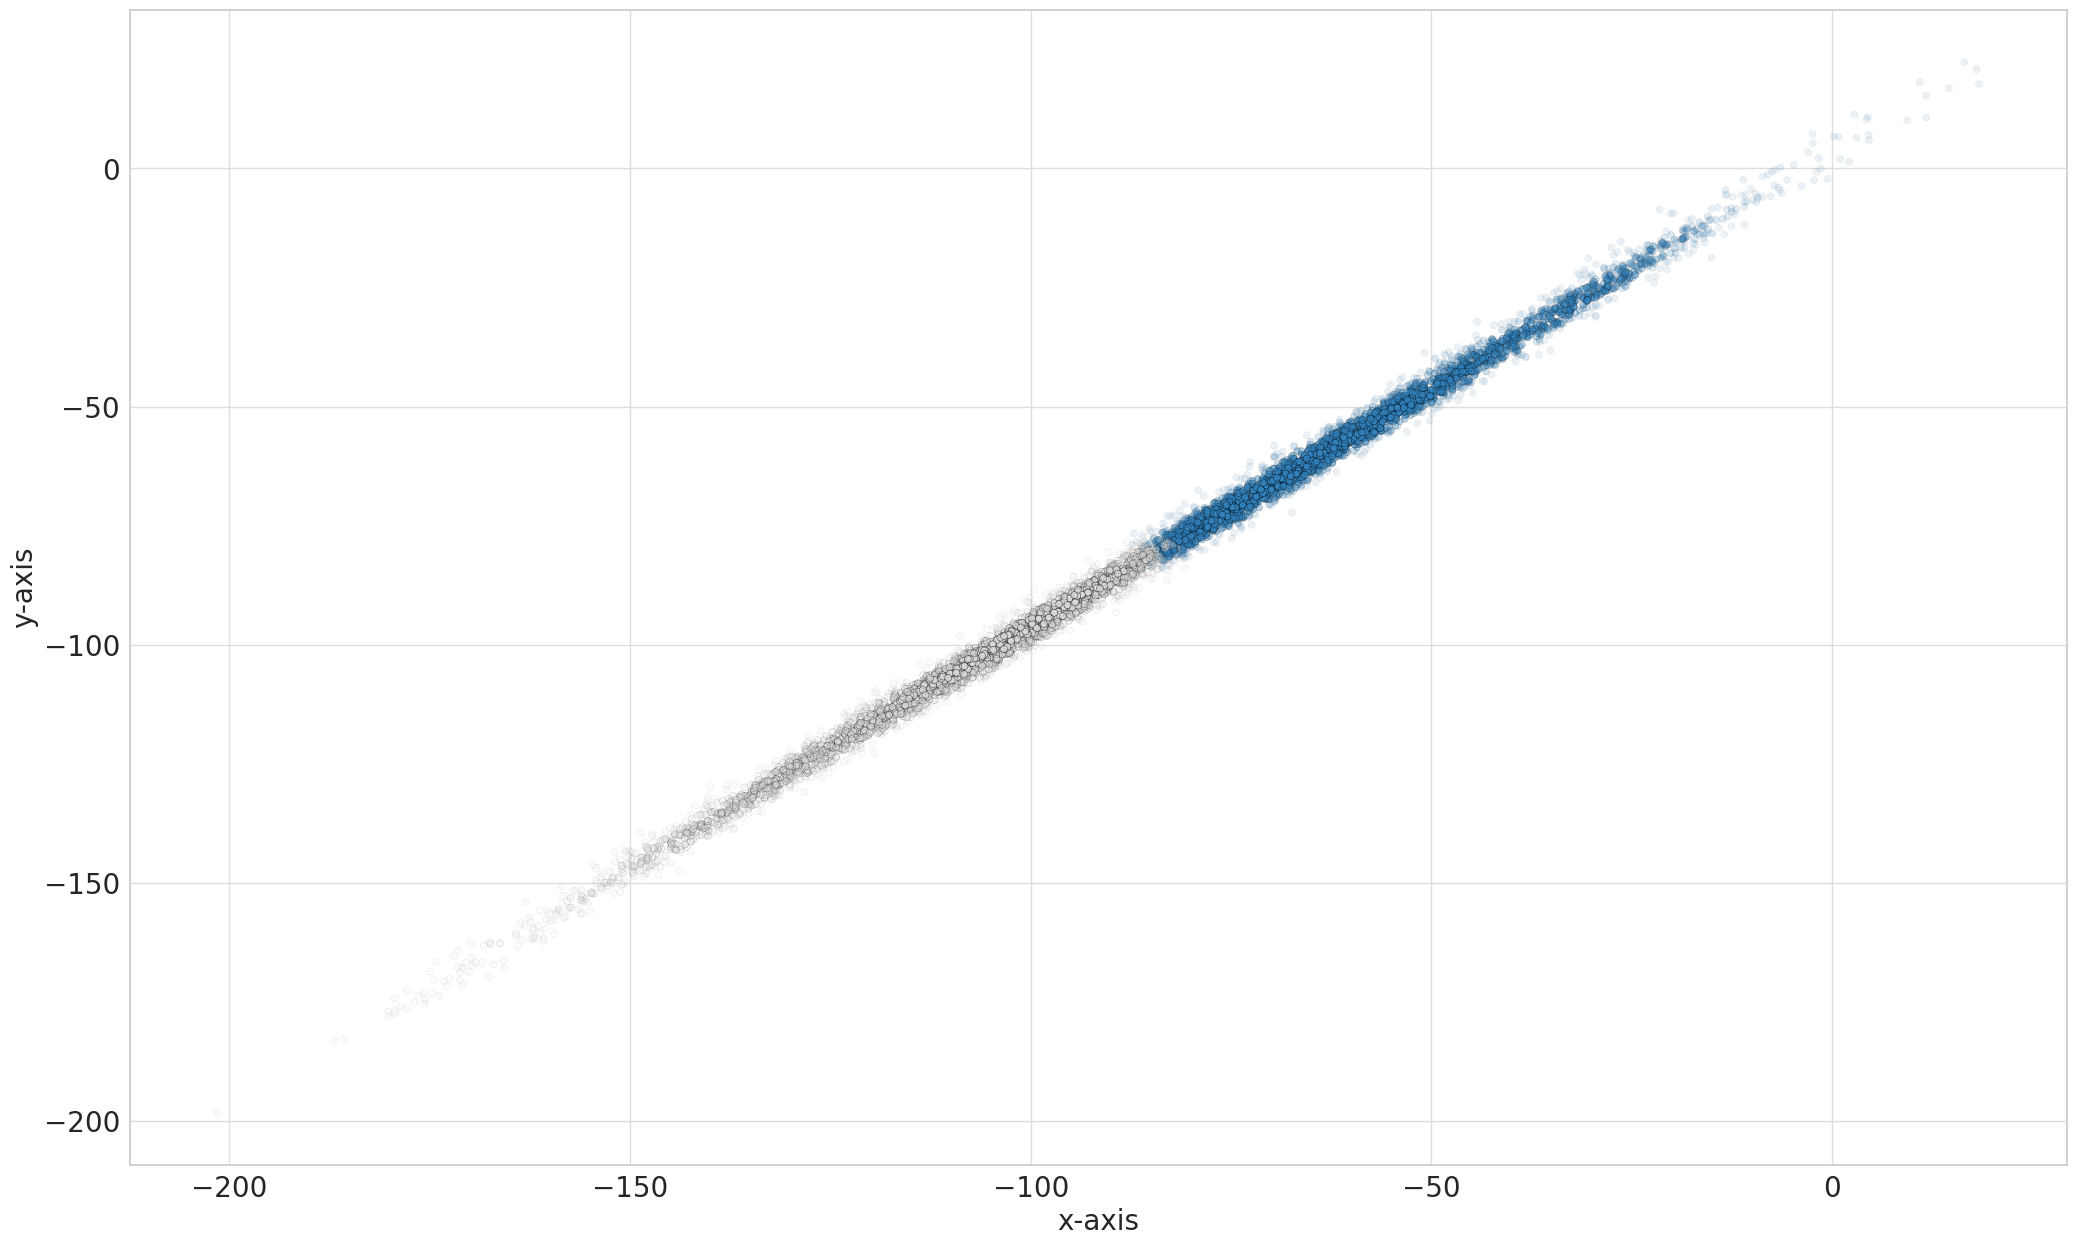

In [6]:
enrichment_results = ce.enrichment(embedding_df)
ce.scatter(n_feat=3)

### Plotting Elbowplot

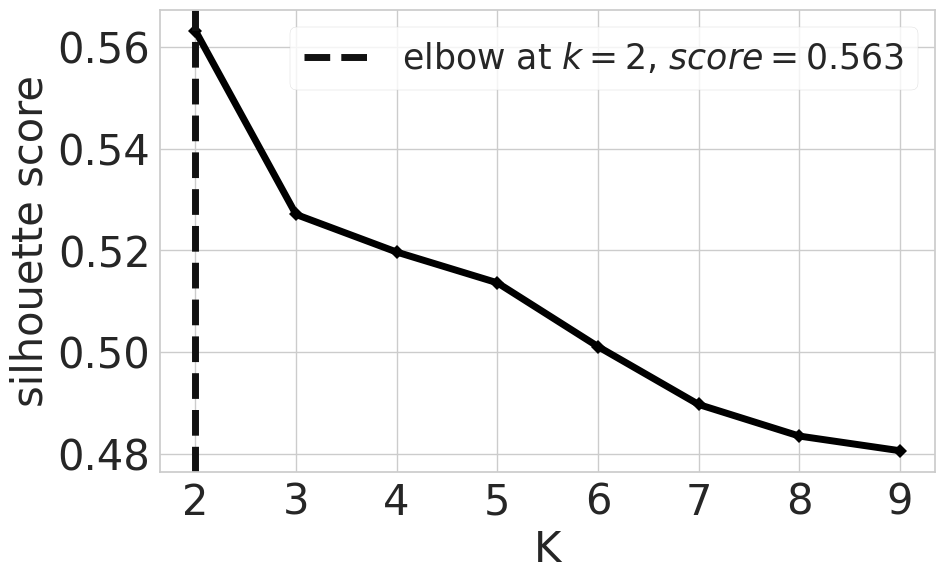

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [7]:
elbowplot(embedding_df,  KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER))

### Plotting Silhouette

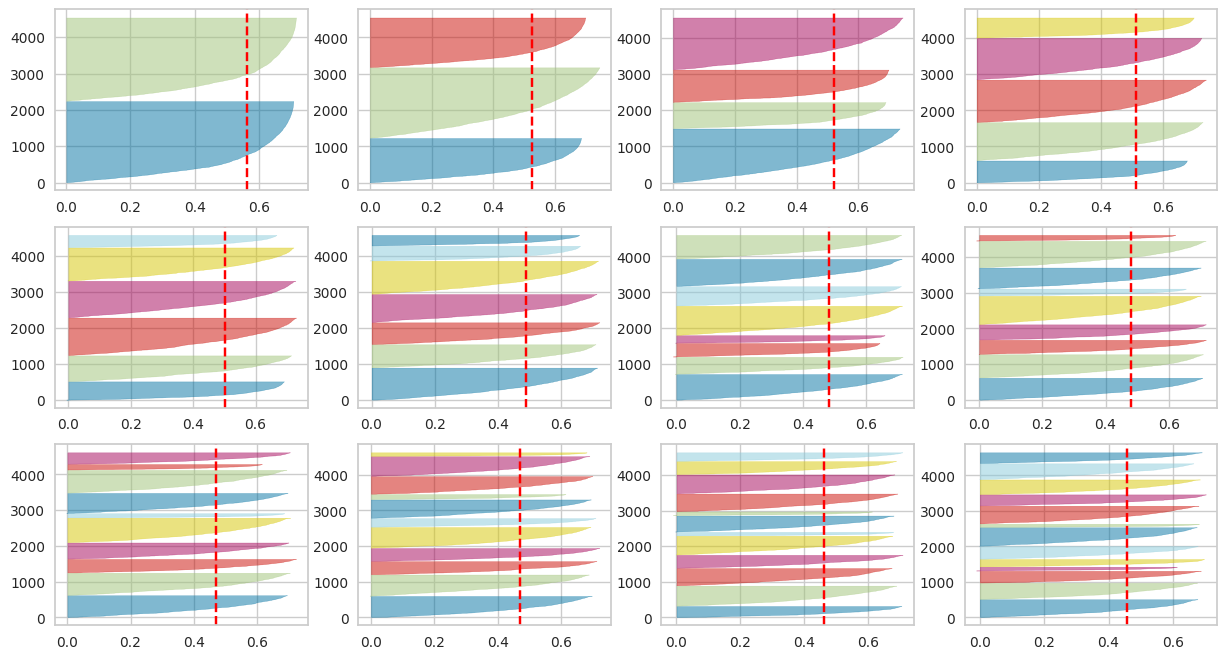

In [8]:
silhouetteplot(embedding_df)

### TSN-e Visualization

In [18]:
tsne = TSNE(n_components=3, verbose=1, perplexity=200, n_iter=5000, learning_rate=200)
X_3d = tsne.fit_transform(embedding_df)

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 4521 samples in 2.469s...
[t-SNE] Computed neighbors for 4521 samples in 11.604s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4521
[t-SNE] Computed conditional probabilities for sample 2000 / 4521
[t-SNE] Computed conditional probabilities for sample 3000 / 4521
[t-SNE] Computed conditional probabilities for sample 4000 / 4521
[t-SNE] Computed conditional probabilities for sample 4521 / 4521
[t-SNE] Mean sigma: 434.908760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.987358
[t-SNE] KL divergence after 5000 iterations: 0.105733


In [19]:
km = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
km.fit(X_3d)

KMeans(max_iter=100, n_clusters=2, n_init=10)

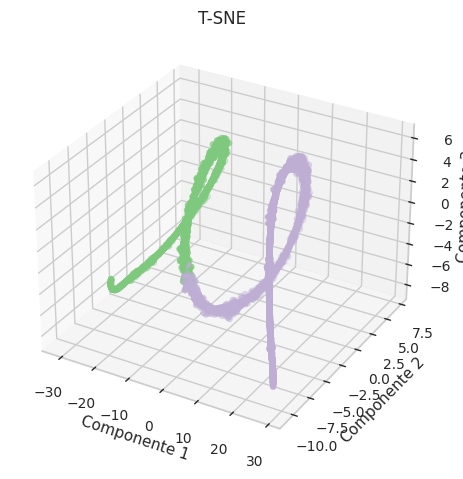

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=plt.cm.Accent(km.labels_), s=20)

ax.set_title('T-SNE')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.show()

### Reducing

In [4]:
import umap.umap_ as umap
import numpy as np

reducer = umap.UMAP(n_neighbors=200, n_components=200, metric="cosine", random_state=42)

# Redução de dimensionalidade
data_umap = reducer.fit_transform(embedding_df)

/home/fillipe.silva/miniconda3/envs/llmsegm/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


### MetrIcs

In [5]:
#The Davies-Bouldin index is a metric for evaluating clustering algorithms where a lower score indicates 
#clusters with high similarity within themselves and low similarity between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=1000).fit(embedding_df)
ylabel = kmeans.labels_
print("Davies-Bouldin Index (without umap):", davies_bouldin_score(embedding_df, ylabel))

#The Calinski-Harabasz index, also known as the variance ratio criterion, is a measure of cluster validity, 
#where a higher score indicates better-defined clusters characterized by tight cohesion within clusters and good separation between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(embedding_df)
print("Calinski Harabasz Score (without umap):", calinski_harabasz_score(embedding_df, kmeans.labels_))

#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, 
#with a higher score indicating a better fit of objects within their own cluster and greater separation from other clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
print("Silhouette Score (without umap):", silhouette_score(embedding_df, kmeans.fit_predict(embedding_df)))

Davies-Bouldin Index (without umap): 0.5874735667783033
Calinski Harabasz Score (without umap): 8937.202341892109
Silhouette Score (without umap): 0.5631495749530797


In [6]:
#The Davies-Bouldin index is a metric for evaluating clustering algorithms where a lower score indicates 
#clusters with high similarity within themselves and low similarity between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=1000).fit(data_umap)
ylabel = kmeans.labels_
dbi = davies_bouldin_score(data_umap, ylabel)
print("Davies-Bouldin Index (with umap):", dbi)

#The Calinski-Harabasz index, also known as the variance ratio criterion, is a measure of cluster validity, 
#where a higher score indicates better-defined clusters characterized by tight cohesion within clusters and good separation between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(data_umap)
print("Calinski Harabasz Score (with umap):", calinski_harabasz_score(data_umap, kmeans.labels_))

#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, 
#with a higher score indicating a better fit of objects within their own cluster and greater separation from other clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
print("Silhouette Score (with umap):", silhouette_score(data_umap, kmeans.fit_predict(data_umap)))

'''
Davies-Bouldin Index (with umap): 1.0978499336637113
Calinski Harabasz Score (with umap): 1386.537068045779
Silhouette Score (with umap): 0.30870458
'''

Davies-Bouldin Index (with umap): 0.6606177990569734
Calinski Harabasz Score (with umap): 7722.999363578124
Silhouette Score (with umap): 0.5298581


'\nDavies-Bouldin Index (with umap): 1.0978499336637113\nCalinski Harabasz Score (with umap): 1386.537068045779\nSilhouette Score (with umap): 0.30870458\n'

In [ ]:
###